# 4 Decision Trees, Ensembling and Double Descent

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [4]:
x_train = np.load("hw2_fashionmnist/train.npy")
y_train = np.load("hw2_fashionmnist/trainlabels.npy")
x_test = np.load("hw2_fashionmnist/test.npy")
y_test = np.load("hw2_fashionmnist/testlabels.npy")
class_names = ['T-shirt/top','trouser','pullover','dress','coat','sandal','shirt','sneaker','bag','ankle boot']

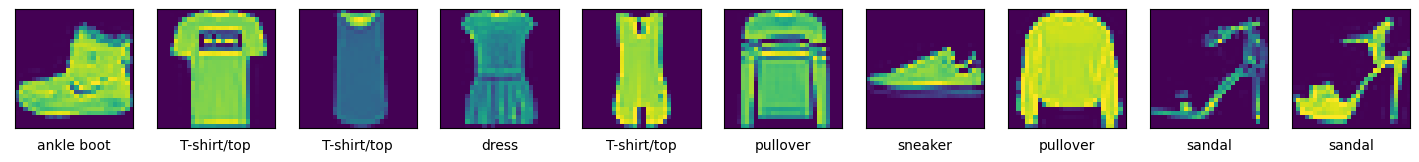

In [5]:
plt.figure(figsize=(18,5))
for i in range(10):
  plt.subplot(1,10,i+1) #creates 25 subplots in the image
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(x_train[i])
  plt.xlabel(class_names[y_train[i]])

In [6]:
x_train.shape

(60000, 28, 28)

In [7]:
x_test.shape

(10000, 28, 28)

In [8]:
y_train.shape

(60000,)

# Decision Tree

(ii) As a first step, train a series of decision trees on the training split of FashionMNIST, with a varying limit on the maximum number of permitted leaf nodes. Once trained, evaluate the performance of your classifiers on both the train and test splits, plotting the 0-1 loss of the train/test curves against the maximum permitted number of leaf nodes (log scale horizontal axis). You are permitted to use an open source implementation of a decision tree classifier (such as sklearn’s DecisionTreeClassifier) as long as you are able to control the maximum number of leaves. What is the minimum loss you can achieve and what do you observe on the plot?

In [9]:
ntrain, h, w = x_train.shape
ntest, h, w = x_test.shape
xtrain = x_train.reshape((ntrain, h*w))
xtest = x_test.reshape((ntest, h*w))

In [10]:
tree = DecisionTreeClassifier()
tree.fit(xtrain, y_train)
tree.get_n_leaves()

4906

In [11]:
max_leaves = [2, 100, 500, 1000, 2000, 3000, 4000, 5000, 7000, 10000, 20000]
train_loss = []
test_loss = []
actual_leaves = []
for max_leaf in max_leaves:
    tree = DecisionTreeClassifier(max_leaf_nodes = max_leaf)
    tree.fit(xtrain, y_train)
    train_loss.append(1 - tree.score(xtrain, y_train))
    test_loss.append(1 - tree.score(xtest, y_test))
    actual_leaves.append(tree.get_n_leaves())

In [12]:
min_loss = min(test_loss)
print('minimum loss is',min_loss)

minimum loss is 0.1846


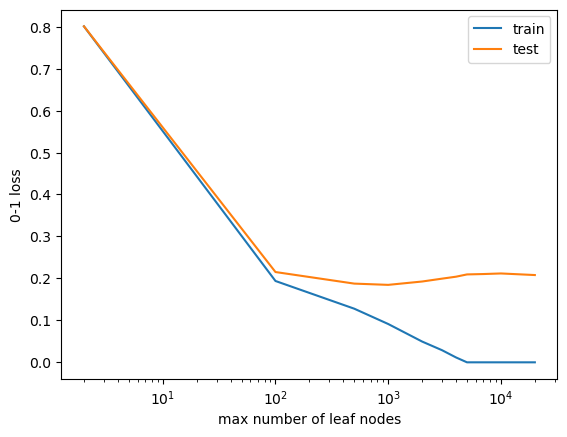

In [13]:
plt.xlabel('max number of leaf nodes')
plt.ylabel('0-1 loss')
plt.plot(max_leaves, train_loss, label = 'train')
plt.plot(max_leaves, test_loss, label = 'test')
plt.xscale('log')
plt.legend()
plt.show()

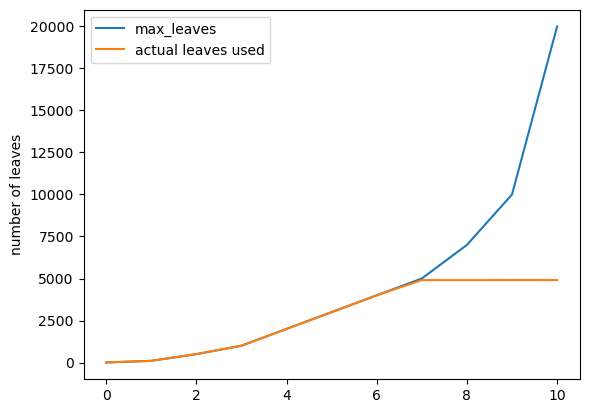

maximum leaves used = 4908


In [27]:
x = np.arange(len(max_leaves))
plt.ylabel('number of leaves')
plt.plot(x, max_leaves, label = 'max_leaves')
plt.plot(x, actual_leaves, label = 'actual leaves used')
plt.legend()
plt.show()

print('maximum leaves used =', max(actual_leaves))

(v) With the random forest model, we now have two hyperparameters to control: the number of estimators and the maximum permitted leaves in each estimator, making the total parameter count the product of the two. In the ensuing sections, you are allowed to use an open source implementation of the random forest classifier (such as sklearn’s RandomForestClassifier) as long as you can control the number of estimators used and maximum number of leaves in each decision tree trained.

(a) First, make a plot measuring the train and test 0-1 loss of a random forest classifier with a fixed number of estimators (default works just fine) but with varying number of maximum allowed tree leaves for individual estimators. You should plot the train and test error on the same axis against a log scale of the total number of parameters on the horizontal axis. In this case, you are making individual classifiers more powerful but keeping the size of the forest the same. What do you observe- does an overfit seem possible?

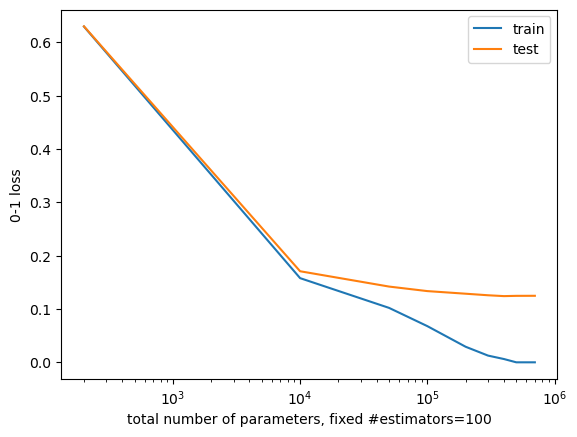

In [16]:
# number of estimators = 100 (default)
max_leaf1 = [2, 100, 500, 1000, 2000, 3000, 4000, 5000, 7000]
forest_train_loss = []
forest_test_loss = []
for num_leaf in max_leaf1:
    forest = RandomForestClassifier(max_leaf_nodes = num_leaf)
    forest.fit(xtrain, y_train)
    forest_train_loss.append(1 - forest.score(xtrain, y_train))
    forest_test_loss.append(1 - forest.score(xtest, y_test))

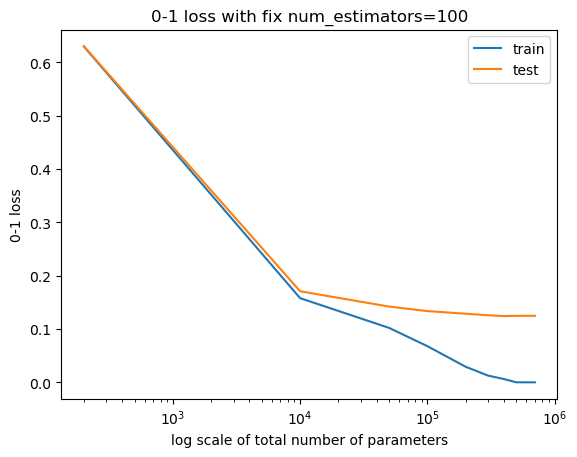

In [20]:
num_param = [i * 100 for i in max_leaf1]
plt.xlabel('log scale of total number of parameters')
plt.ylabel('0-1 loss')
plt.title('0-1 loss with fix num_estimators=100')
plt.plot(num_param, forest_train_loss, label = 'train')
plt.plot(num_param, forest_test_loss, label = 'test')
plt.xscale('log')
plt.legend()
plt.show()

(b) Second, make a plot measuring the train and test 0-1 loss of a random forest classifier with a fixed maximum number of leaves but varying number of estimators. You should plot the train and test error on the same axis against a log scale of the total number of parameters on the horizontal axis. Ensure that the maximum number of leaves permitted is small compared to your answer in part (iii) to have shallower trees. In this case, you are making the whole forest larger without allowing any individual tree to fit the data perfectly, aka without any individual tree achieving zero empirical risk. How does your best loss compare to the best loss achieved with a single decision tree? What about for a similar number of total parameters? With a sufficiently large number of estimators chosen, you should still see variance increasing, albeit with an overall lower test loss curve.

In [24]:
# max_leaf = 100
num_estimator = [10, 50, 100, 200, 300, 400, 500]
f_train_loss = []
f_test_loss = []
for est in num_estimator:
    f = RandomForestClassifier(max_leaf_nodes = 100, n_estimators = est)
    f.fit(xtrain, y_train)
    f_train_loss.append(1 - f.score(xtrain, y_train))
    f_test_loss.append(1 - f.score(xtest, y_test))

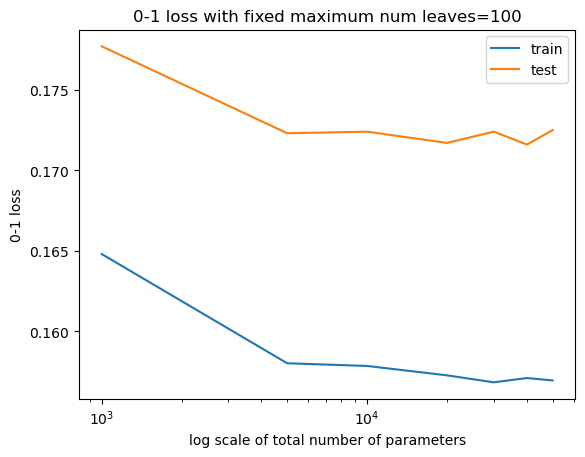

In [26]:
num_param = [i * 100 for i in num_estimator]
plt.xlabel('log scale of total number of parameters')
plt.ylabel('0-1 loss')
plt.title('0-1 loss with fixed maximum num leaves=100')
plt.plot(num_param, f_train_loss, label = 'train')
plt.plot(num_param, f_test_loss, label = 'test')
plt.xscale('log')
plt.legend()
plt.show()

(vi) Now we will generate a final plot. Here we will vary both the number of estimators and the number of maximum leaves allowed, albeit in a structured manner. First while allowing only a single estimator (effectively reducing the random forest to a decision tree) increase the maximum leaves permitted until your answer in part (iii), aka the number of leaves needed for the single tree to overfit- we will call this Phase 1. Now, keeping the maximum permitted leaves the same, keep doubling the number of estimators allowed. We will call this Phase 2. Train a random forest for all these combinations and make a plot of the train and test 0-1 loss versus the total number of parameters on a log scale. Note that Phase 1 and Phase 2 is clearly separable on the horizontal axis. Please note the following details as you perform the experiment to make it clear why this experiment is different from the ones you have previously performed. What surprising result do you observe from the loss curve at the end of phase 1?


In [36]:
max_num_leaf = [2, 100, 500, 1000, 2000, 3000, 4000, 5000]
num_est= [2,4,8,16,32,64,128,256]
train_loss5 = []
test_loss5 = []
for leaf in max_num_leaf:
    rf = RandomForestClassifier(max_leaf_nodes = leaf, n_estimators = 1)
    rf.fit(xtrain, y_train)
    train_loss5.append(1 - rf.score(xtrain, y_train))
    test_loss5.append(1 - rf.score(xtest, y_test))
for e in num_est:
    rf = RandomForestClassifier(max_leaf_nodes = 5000, n_estimators = e)
    rf.fit(xtrain, y_train)
    train_loss5.append(1 - rf.score(xtrain, y_train))
    test_loss5.append(1 - rf.score(xtest, y_test))

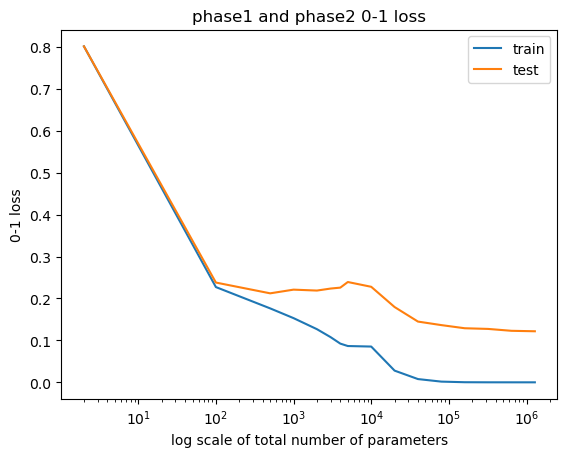

In [37]:
num_param =max_num_leaf
num_param.extend([5000*i for i in num_est])
plt.xlabel('log scale of total number of parameters')
plt.ylabel('0-1 loss')
plt.title('phase1 and phase2 0-1 loss')
plt.plot(num_param, train_loss5, label = 'train')
plt.plot(num_param, test_loss5, label = 'test')
plt.xscale('log')
plt.legend()
plt.show()